In [383]:
import numpy as np
import pandas as pd
import sklearn  as sk
from sklearn.model_selection import RepeatedKFold 
import matplotlib.pyplot as plt
from sklearn import svm

# reading input wav file

In [384]:

from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav

In [385]:
(rate,sig) = wav.read("/home/nikita/Documents/Speaker change detection/data/LDC2007S10.wav")
data = mfcc(sig,rate)
type(data)

numpy.ndarray

In [386]:
#deleting energy coefficient from mfcc feature
data = np.delete(data, 0, 1)

In [387]:
no_of_data_samples=data.shape[0]
print("no of data samples=",no_of_data_samples)
print(data.shape)

no of data samples= 179999
(179999, 12)


# Reading actual change points found using transcript file(Dataset:NIST RT03 meeting data) [change_points_list.npy]

In [388]:

cp=np.load("change_points_list.npy")
cp=cp.astype(int)
# print(cp[0:100])
no_of_change_points=cp.shape
no_of_change_points=no_of_change_points[0]
print("Total no of change points=",no_of_change_points)

Total no of change points= 448


In [389]:
classifier=svm.OneClassSVM(nu=0.1,kernel="linear",gamma=0.1)

# 1classsvm.decision_function-Signed distance to the separating hyperplane.Signed distance is positive for an inlier and negative for an outlier.

In [391]:
speaker_accuracy=pd.DataFrame(columns=['data1','data2','data3','actual_speaker','next_speaker'])

# Visualizing 1classSVM performance by modeling 1classSVM on one speaker data and testing accuracy of next speaker on that model and that speaker data itself

In [392]:
# speaker1 speaker2
a=0
t=cp[0]
data_sample=data[a:t]
no_of_data_points,no_of_features=data_sample.shape
#fitting 1classsvm to 1st speaker
classifier.fit(data_sample,(no_of_data_points,12))
#calculating signed distance for two speakers with respect to 1classsvm of 1st speaker
p1=classifier.decision_function(data[0:cp[0]])
pred1=classifier.predict(data[0:cp[0]])
# print(p1.shape)
p2=classifier.decision_function(data[cp[0]:cp[1]])
pred2=classifier.predict(data[cp[0]:cp[1]])
# print(p1.max())
# print(p1.min())
i1=p1.shape
k1=0
c1=0
for k1 in range(0,i1[0]):
    if(p1[k1]>0):
        c1=c1+1
#     print(c1)
acc1=c1/i1[0]

i2=p2.shape
# print(i2)
k2=0
c2=0
for k2 in range(0,i2[0]):
    if(p2[k2]>0):
        c2=c2+1
#     print(c2)
acc2=c2/i2[0]
speaker_accuracy=speaker_accuracy.append({'data1':0, 'data2':cp[0], 'data3':cp[1], 'actual_speaker':acc1, 'next_speaker':acc2}, ignore_index=True)

# Figure depicting 1-class SVM on trained data of single speaker only
+1.0 represents correct classification 

-1.0  represents misclassification (very few)

<Figure size 432x288 with 0 Axes>

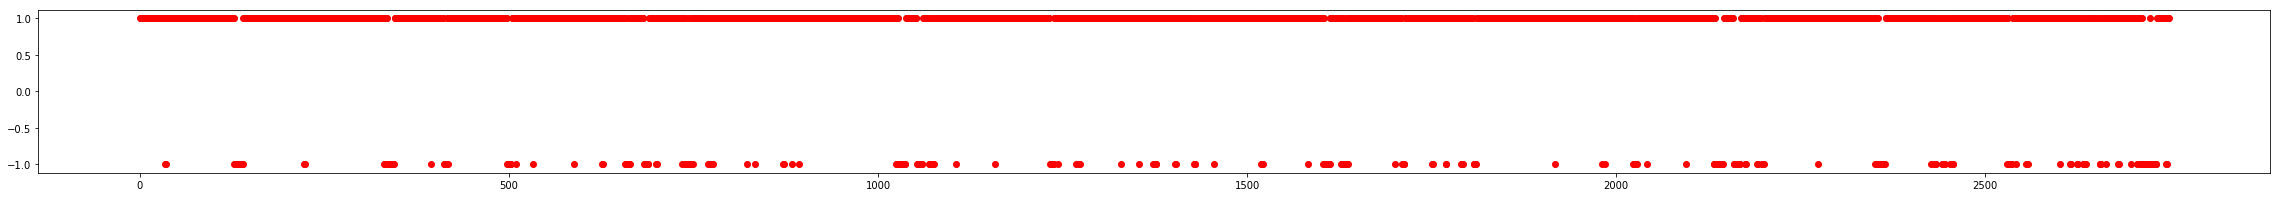

In [394]:
# 0 2750 3108 <-speaker change occurs like that in data point
# so we modeled 1classSVM on 0-2749 data points and tested on 0-2749(Actual speaker) and 2750-3107(next speaker)
# plotting predicted value (-1:data point does not belong to model,1:data point belong to model)
y=np.arange(3108)
fig = plt.figure()
plt.figure(figsize=(40,3))
ax = plt.subplot(111)
ax.scatter(y[0:2750], pred1, color='r')
# ax.scatter(y[2750:3025], pred2[0:275], color='b')

#  Figure depicting the change between  two speakers 
Blue=First Speaker (label +1.0 on y axis)

Orange =Second Speaker (label -1.0 on y axis)  

<Figure size 432x288 with 0 Axes>

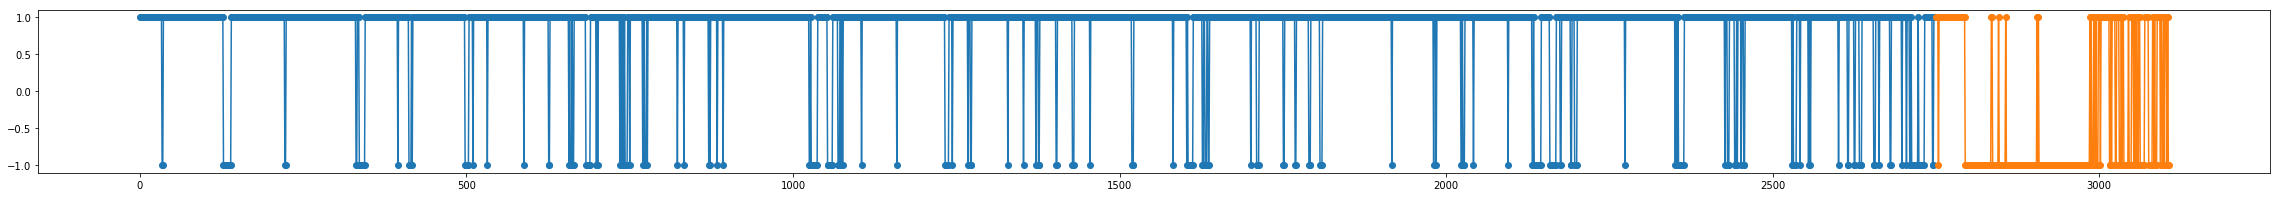

In [395]:
y=np.arange(3108)
fig = plt.figure()
plt.figure(figsize=(40,3))
ax = plt.subplot(111)
# print(pred2.shape)
ax.plot(y[0:2750], pred1, '-o') #blue curve shows testing on actual speaker data
ax.plot(y[2750:3108], pred2[0:358], '-o') #orange curve shows testing on next speaker data

In [1]:
#In the above graph blue points on -1.0 label shows misclassification of speaker1 data and orange points
# on +1.0 label shows misclassification of speaker2 data.

In [398]:

ind=0
for ind in range(0,75): 
    a=cp[ind]
    t=cp[ind+1]
    data_sample=data[a:t]
    no_of_data_points,no_of_features=data_sample.shape
    #fitting 1classsvm to 1st speaker
    classifier.fit(data_sample,(no_of_data_points,12))
    #calculating signed distance for two speakers with respect to 1classsvm of 1st speaker
    p1=classifier.decision_function(data[cp[ind]:cp[ind+1]])
    p2=classifier.decision_function(data[cp[ind+1]:cp[ind+2]])
    pred11=classifier.predict(data[cp[ind]:cp[ind+1]])
    pred22=classifier.predict(data[cp[ind+1]:cp[ind+2]])
    i1=p1.shape
    k1=0
    c1=0
    for k1 in range(0,i1[0]):
        if(p1[k1]>0):
            c1=c1+1
#     print(c1)
    acc1=c1/i1[0]

    i2=p2.shape
    # print(i2)
    k2=0
    c2=0
    for k2 in range(0,i2[0]):
        if(p2[k2]>0):
            c2=c2+1
#     print(c2)
    acc2=c2/i2[0]
    speaker_accuracy=speaker_accuracy.append({'data1':cp[ind], 'data2':cp[ind+1], 'data3':cp[ind+2], 'actual_speaker':acc1, 'next_speaker':acc2}, ignore_index=True)

In [401]:
speaker_accuracy

,data1,data2,data3,actual_speaker,next_speaker
0,0.0,2750.0,3108.0,0.899636,0.321229
1,2750.0,3108.0,3807.0,0.896648,0.836910
2,3108.0,3807.0,8264.0,0.898426,0.743774
3,3807.0,8264.0,8382.0,0.899933,0.093220
4,8264.0,8382.0,13075.0,0.889831,0.548476
5,8382.0,13075.0,13742.0,0.900064,0.673163
6,13075.0,13742.0,17372.0,0.904048,0.936639
7,13742.0,17372.0,18906.0,0.900275,0.672099
8,17372.0,18906.0,21428.0,0.900913,0.688739
9,18906.0,21428.0,21473.0,0.899683,0.822222


## Trying incremental approach of detecting change point using 1class SVM

In [402]:
#c = no of change point detected
c=0
i=2750
classifier.fit(data[0:2750],(2750,12))
while i<no_of_data_samples:
    if(classifier.predict([data[i]])==-1):
        #data point does not belong to cluster, make new svm
        print("may be change point at",i)
        a=i
        t=a+300
        if(i+300<no_of_data_samples):
            data_sample=data[a:t]
            classifier.fit(data_sample,(300,12))
        i=i+300
        c=c+1
    else:
        i=i+1
        
  #  classifier.fit(data_sample,(t-a,13))
       
    #else:
        #print("1")


may be change point at 2754
may be change point at 3154
may be change point at 3481
may be change point at 3788
may be change point at 4110
may be change point at 4418
may be change point at 4747
may be change point at 5067
may be change point at 5390
may be change point at 5694
may be change point at 6031
may be change point at 6357
may be change point at 6659
may be change point at 6978
may be change point at 7279
may be change point at 7594
may be change point at 7947
may be change point at 8259
may be change point at 8579
may be change point at 8890
may be change point at 9196
may be change point at 9501
may be change point at 9801
may be change point at 10121
may be change point at 10438
may be change point at 10764
may be change point at 11073
may be change point at 11383
may be change point at 11710
may be change point at 12024
may be change point at 12324
may be change point at 12648
may be change point at 12960
may be change point at 13271
may be change point at 13603
may be c

may be change point at 95370
may be change point at 95695
may be change point at 96001
may be change point at 96303
may be change point at 96605
may be change point at 96913
may be change point at 97231
may be change point at 97590
may be change point at 97959
may be change point at 98307
may be change point at 98632
may be change point at 98942
may be change point at 99271
may be change point at 99580
may be change point at 99883
may be change point at 100217
may be change point at 100517
may be change point at 100818
may be change point at 101118
may be change point at 101422
may be change point at 101732
may be change point at 102041
may be change point at 102357
may be change point at 102686
may be change point at 102995
may be change point at 103295
may be change point at 103617
may be change point at 103933
may be change point at 104236
may be change point at 104552
may be change point at 104874
may be change point at 105184
may be change point at 105500
may be change point at 10

In [403]:
print("no of change points predicted=",c)

no of change points predicted= 556


# Conclusion

In [3]:
# This notebook deals with detecting speaker change points using 1 class svm. 